In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [65]:
file = "temperature.csv"
data = pd.read_csv(file)

In [66]:
temperature = data.AverageTemperatureFahr
days = data.Days

In [67]:
def plot_data(temperature, days):
    fig = plt.figure()
    plt.plot(days, temperature, 'ro', ms=10, mec='k')
    plt.ylabel("Temperature")
    plt.xlabel("Days")

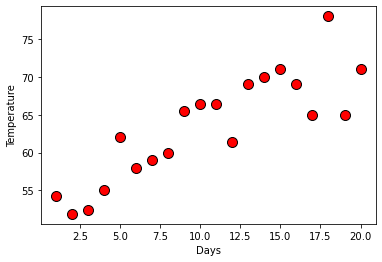

In [68]:
plot_data(temperature, days)

In [69]:
temperature = np.stack([np.ones(days.size), temperature], axis = 1)
def compute_cost_function(temperature, days, theta):
    n = days.size
    cost = 0
    cost = (1 / (2 * n)) * np.sum(np.square(np.dot(temperature, theta) - days))
    return cost

In [70]:
compute_cost_function(temperature, days, theta = np.array([0.0, 0.0]))

71.75

In [71]:
def gradient_descent(temperature, days, theta, alpha, iteration):
    dot_product = np.dot(temperature, theta)
    m = days.shape[0]
    cost_history = []
    theta = theta.copy()

    for i in range(iteration):
        theta = theta - (alpha / m) * (dot_product - days).dot(temperature)
        cost_history.append(compute_cost_function(temperature, days, theta))
    return theta, cost_history

In [72]:
theta = np.zeros(2)
iterations = 1500
alpha = 0.000001

theta, cost_history = gradient_descent(temperature, days, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: 0.0158, 1.0513
Expected theta values (approximately): [-3.6303, 1.1664]


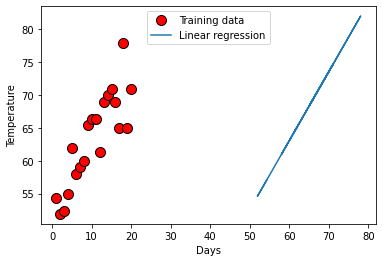

In [73]:
plot_data(temperature[:, 1], days)
plt.plot(temperature[:, 1], np.dot(temperature, theta), '-')
plt.legend(['Training data', 'Linear regression']);